<a href="https://colab.research.google.com/github/seokmin1/PDM08/blob/main/py-tensorflow/DL1-FCN/mnist06_FCN_test_ALL_best_save.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## DNN (Deep Neural Networks) 구현 방법
> - **Sequential model**
> - Functional model
> - Subclassing model

# **Test of mnist FCN model**
## Sequential model
- FCN3

***

![mnist_NN_2_layers](https://raw.githubusercontent.com/Redwoods/Py/master/pdm2020/my-note/py-tensorflow/images/mnist_NN_2_layers.png)

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib inline

print(tf.__version__)

2.7.0


## **데이터 로딩, 정규화**

In [2]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train/255.0, X_test/255.0 # 정규화

print("X_train={0}".format(X_train.shape))
print("y_train={0}".format(y_train.shape)) 
print("X_test={0}".format(X_test.shape))
print("y_test={0}".format(y_test.shape))

11501568/11490434 [==============================] - 0s 0us/step
X_train=(60000, 28, 28)
y_train=(60000,)
X_test=(10000, 28, 28)
y_test=(10000,)


In [3]:
# One-Hot-Encoding
# Use function to_categorical() to do One-Hot-Encoding
# tf.keras.utils.to_categorical
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

## **FCN3**

### Control of training process
- EarlyStopping
    - patience
- ModelCheckpoint
    > Save best model during training

In [4]:
from tensorflow.keras import callbacks
# from callbacks import ModelCheckpoint, EarlyStopping

In [5]:
mc_callback = callbacks.ModelCheckpoint(filepath="./mnist_fcn3_best_weights.{epoch:03d}-{val_accuracy:.3f}.hdf5", 
                              monitor='val_accuracy', verbose=0, save_best_only=True)
es_callback = callbacks.EarlyStopping(monitor='val_accuracy', 
                            mode='max', verbose=1, patience=20) 

In [6]:
# set random number seed
np.random.seed(1234)
tf.random.set_seed(1234)

fcn3 = tf.keras.models.Sequential([ 
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='relu'),  
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(128, activation='relu'),  
    tf.keras.layers.Dropout(0.25), 
    tf.keras.layers.Dense(10, activation='softmax')
])

fcn3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 


In [7]:
fcn3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trai

In [8]:
# Training with callbacks
hist = fcn3.fit(X_train,y_train, 
                epochs= 100 , 
                batch_size =100,
                validation_data=(X_test,y_test),
                callbacks=[mc_callback, es_callback])

Epoch 1/100
600/600 [==============================] - 6s 5ms/step - loss: 0.3509 - accuracy: 0.8952 - val_loss: 0.1296 - val_accuracy: 0.9587
Epoch 2/100
600/600 [==============================] - 3s 4ms/step - loss: 0.1499 - accuracy: 0.9555 - val_loss: 0.0951 - val_accuracy: 0.9692
Epoch 3/100
600/600 [==============================] - 3s 4ms/step - loss: 0.1107 - accuracy: 0.9670 - val_loss: 0.0794 - val_accuracy: 0.9753
Epoch 4/100
600/600 [==============================] - 3s 4ms/step - loss: 0.0881 - accuracy: 0.9735 - val_loss: 0.0741 - val_accuracy: 0.9751
Epoch 5/100
600/600 [==============================] - 3s 4ms/step - loss: 0.0750 - accuracy: 0.9765 - val_loss: 0.0724 - val_accuracy: 0.9770
Epoch 6/100
600/600 [==============================] - 3s 4ms/step - loss: 0.0655 - accuracy: 0.9794 - val_loss: 0.0608 - val_accuracy: 0.9800
Epoch 7/100
600/600 [==============================] - 3s 4ms/step - loss: 0.0601 - accuracy: 0.9809 - val_loss: 0.0658 - val_accuracy: 0.9786

In [9]:
fcn3.evaluate(X_test, y_test, batch_size= 100)

100/100 [==============================] - 0s 3ms/step - loss: 0.0897 - accuracy: 0.9838


[0.08966414630413055, 0.9837999939918518]

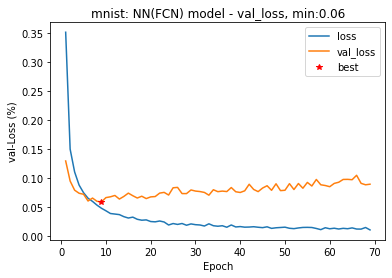

In [10]:
# 훈련 데이터와 검증 데이터에 대한 loss 시각화.
epochs = range(1, len(hist.history['loss']) + 1)

loss_list = hist.history['loss'] #[100 * i for i in history.history['loss']]
vloss_list = hist.history['val_loss'] #[100 * i for i in history.history['val_loss']]

plt.plot(epochs,loss_list)  
plt.plot(epochs,vloss_list)

plt.plot(np.argmin(np.array(vloss_list))+1,vloss_list[np.argmin(np.array(vloss_list))], 'r*')
plt.title('mnist: NN(FCN) model - val_loss, min:' + str(np.round(vloss_list[np.argmin(np.array(vloss_list))],2)))
plt.ylabel('val-Loss (%)')
plt.xlabel('Epoch')
plt.legend(['loss','val_loss','best'], loc='best')
plt.show()

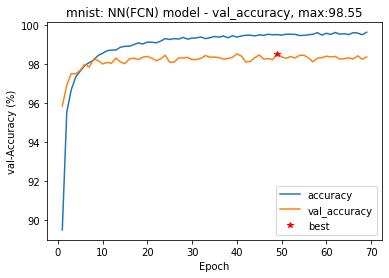

In [11]:
# 훈련 데이터와 검증 데이터에 대한 accuracy 시각화.
epochs = range(1, len(hist.history['accuracy']) + 1)

acc_list = [100 * i for i in hist.history['accuracy']]
vacc_list = [100 * i for i in hist.history['val_accuracy']]

plt.plot(epochs,acc_list)  
plt.plot(epochs,vacc_list)

plt.plot(np.argmax(np.array(vacc_list))+1,vacc_list[np.argmax(np.array(vacc_list))], 'r*')
plt.title('mnist: NN(FCN) model - val_accuracy, max:' + str(np.round(vacc_list[np.argmax(np.array(vacc_list))],2)))
plt.ylabel('val-Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['accuracy','val_accuracy','best'], loc='best')
plt.show()

## 모형의 재사용

- 트레이닝 중 hdf5 형식으로 best model이 저장됨.
- load 명령으로 불러 사용
> best model: mnist_fcn3_best_weights.020-0.986.hdf5 

>> mnist_fcn3_best_weights.044-0.985.hdf5
mnist_fcn3_best_weights.049-0.985.hdf5


In [16]:
from keras.models import load_model

best_model = load_model('mnist_fcn3_best_weights.049-0.985.hdf5')
best_model.evaluate(X_test, y_test, batch_size=100)

100/100 [==============================] - 0s 3ms/step - loss: 0.0786 - accuracy: 0.9855


[0.07858087122440338, 0.9854999780654907]

---

## Visualization of the best model
---
![mnist_fcn_best](https://raw.githubusercontent.com/Redwoods/Py/master/pdm2020/my-note/py-streamlit-21/app/mnist_fcn.png)

In [17]:

def plot_pred(i, pred_y, true_y, img):
    
    plt.grid(False)
    plt.title(class_names[np.argmax(true_y)])
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img)

    predicted_label = np.argmax(pred_y)
    if predicted_label == np.argmax(true_y):   # np.argmax(true_label)
        plt.suptitle("Test image-%d: Classified correctly" % i)
    else:
        plt.suptitle("Test image-%d: Wrong classification" % i)


def plot_bar(pred_y, true_y):
    
    plt.grid(False)
    plt.yticks([])
    plt.xticks(np.arange(10), class_names, rotation=0)

    thisplot = plt.bar(range(10), pred_y, color='grey')
    plt.ylim([0, 1])
    predicted_label = np.argmax(pred_y)

    if predicted_label == np.argmax(true_y):  
        color = 'green'
    else:
        color = 'red'

    thisplot[predicted_label].set_color(color)

In [18]:
X_test.shape,y_test.shape

((10000, 28, 28), (10000, 10))

In [19]:
num = np.random.randint(0, len(y_test))
y_pred0 = best_model.predict(X_test[num:num+1], verbose=1)

1/1 [==============================] - 0s 119ms/step


In [20]:
y_pred0

array([[1.4086367e-27, 8.7278442e-24, 1.0000000e+00, 1.1039504e-17,
        3.4993527e-24, 4.3301332e-24, 8.4532031e-28, 5.5710283e-21,
        1.4692142e-22, 1.7134113e-23]], dtype=float32)

In [21]:
y_test0=y_test[num:num+1]
y_test0

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [22]:
X_test0 = X_test[num]

In [23]:
class_names = ["0","1","2","3","4","5","6","7","8","9"]

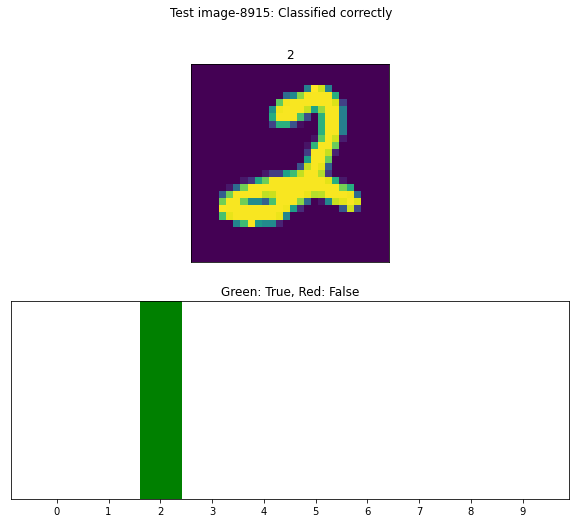

In [24]:
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
plot_pred(num, y_pred0[0], y_test0[0], X_test0)
plt.subplot(2,1,2)
plot_bar(y_pred0[0],  y_test0[0])
plt.title("Green: True, Red: False")
plt.show()

---

1/1 [==============================] - 0s 21ms/step


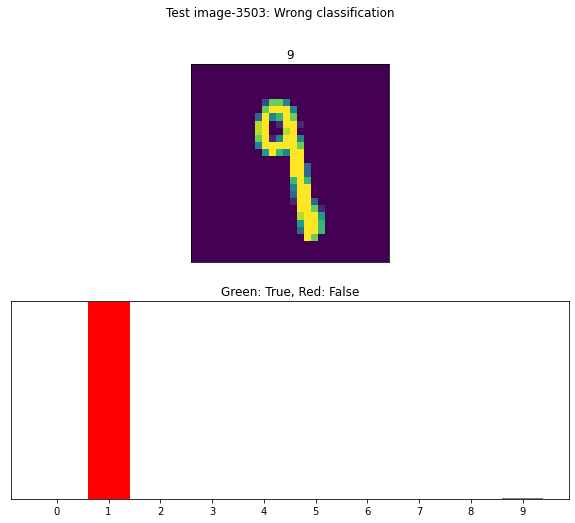

In [44]:
# Random test
num = np.random.randint(0, len(y_test))
y_pred0 = best_model.predict(X_test[num:num+1], verbose=1)
y_test0=y_test[num:num+1]
X_test0 = X_test[num]

class_names = ["0","1","2","3","4","5","6","7","8","9"]

plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
plot_pred(num, y_pred0[0], y_test0[0], X_test0)
plt.subplot(2,1,2)
plot_bar(y_pred0[0],  y_test0[0])
plt.title("Green: True, Red: False")
plt.show()